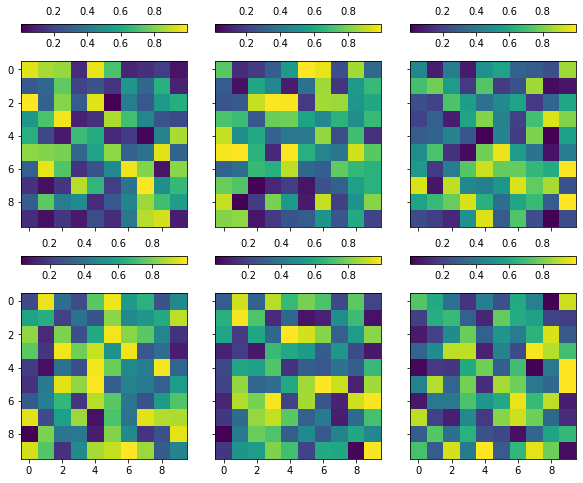

In [3]:
import matplotlib.pyplot as plt
import numpy as np
#from mpl_toolkits.axes_grid1 import ImageGrid

# Create a figure and a 3x2 ImageGrid
fig = plt.figure(figsize=(12, 8))
grid = ImageGrid(
    fig, 111, nrows_ncols=(2, 3), axes_pad=0.4, share_all=True, 
    cbar_location="top", cbar_mode="each"
)

# Generate random data for each panel
data = [np.random.rand(10, 10) for _ in range(6)]

# Loop over each panel
for i, ax in enumerate(grid):
    im = ax.imshow(data[i], cmap="viridis")  # Display data with colormap
    
    # Set colorbars for the top row above and bottom row below
    if i < 3:  # Top row
        cbar = ax.cax.colorbar(im)
        ax.cax.toggle_label(True)
        ax.cax.set_label("Top Label {}".format(i + 1))  # Colorbar label
    else:  # Bottom row
        ax.cax.colorbar(im)#, location="bottom")
        ax.cax.toggle_label(True)
        ax.cax.set_label("Bottom Label {}".format(i - 2))  # Colorbar label

# Display the plot
plt.show()

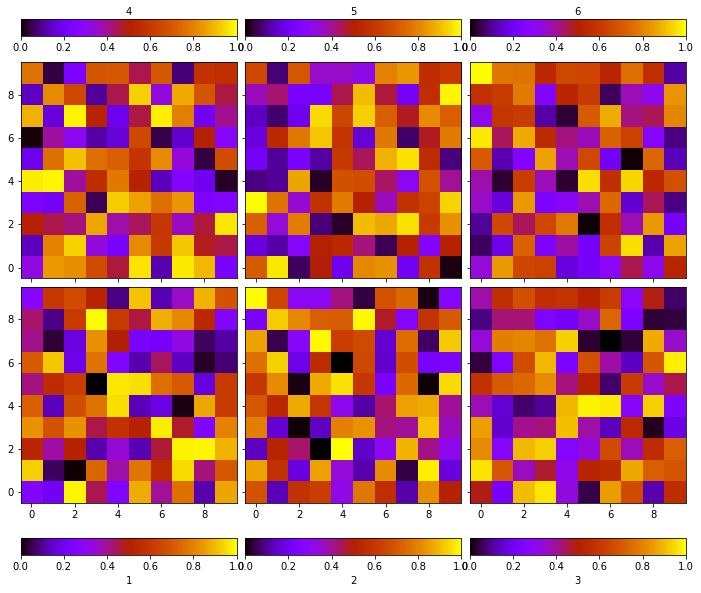

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import LogNorm

def _plot_3x2(figsize, data, labels, cmaps, vmins, vmaxs, fname=""):
    # Create a figure
    fig = plt.figure(figsize=(12,12))

    Ncol=3
    Nrow=2

    dx = 0.25
    dy = 0.25
    deltax = 0.01
    deltay = 0.01

    cbardx=dx
    cbardy=0.02
    cbarpadytop = 0.03
    cbarpadybot = 0.06

    x0 = 0.05
    y0 = 0.1

    # Loop through each panel position
    for irow in range(Nrow):
        for icol in range(Ncol):
            i = irow*Ncol + icol
            ax = fig.add_axes([x0+icol*(dx+deltax),y0+irow*(dy+deltay),dx,dy])
            im = ax.imshow(data[i], cmap=cmaps[i], origin="lower", vmin=vmins[i], vmax=vmaxs[i])

            if irow == 1:
                cbar_axes = fig.add_axes([x0+icol*(dx+deltax),y0+irow*(dy+deltay)+dy+cbarpadytop,cbardx,cbardy])
                cbar = plt.colorbar(im, cax=cbar_axes, orientation="horizontal", label=labels[i])
                cbar.ax.xaxis.set_label_position("top")
            else:
                cbar_axes = fig.add_axes([x0+icol*(dx+deltax),y0-cbarpadybot,cbardx,cbardy])
                cbar = plt.colorbar(im, cax=cbar_axes, orientation="horizontal", label=labels[i])
                cbar.ax.xaxis.set_label_position("bottom")
            if icol > 0:
                ax.set_yticklabels([])
            if irow > 0:
                ax.set_xticklabels([])
    if fname == "":
        plt.show()
    else:
        fig.savefig(fname, bbox_inches="tight")

# Generate random data
data = [np.random.rand(10, 10) for _ in range(6)]
labels = ["1", "2", "3", "4", "5", "6"]
cmaps = ["gnuplot"]*6
vmins = [0.0]*6
vmaxs = [1.0]*6

_plot_3x2((12,12), data, labels, cmaps, vmins, vmaxs)

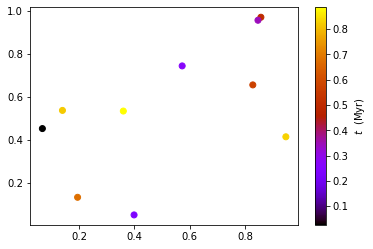

In [25]:
# plot with scatter and cbar
fig, ax = plt.subplots()
Ncolors = 10
sc = ax.scatter(np.random.rand(Ncolors), np.random.rand(Ncolors), c=np.random.rand(Ncolors), cmap="gnuplot")
cbar = plt.colorbar(sc)
cbar.set_label("$t~~(\\mathrm{Myr})$")

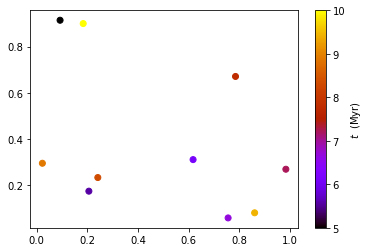

In [38]:
# plot with scatter and cbar
import matplotlib as mpl

continuous = True
fig, ax = plt.subplots()

Ncolors = 10

cmap = plt.get_cmap('gnuplot', Ncolors)
colors=cmap(np.linspace(0.0,0.9,Ncolors))

sc = ax.scatter(np.random.rand(Ncolors), np.random.rand(Ncolors), c=colors)

norm = mpl.colors.Normalize(vmin=5, vmax=10)
if continuous:
    cmap_cb = mpl.cm.gnuplot
else:
    cmap_cb = cmap
cbar = plt.colorbar(ax=ax, mappable=mpl.cm.ScalarMappable(norm=norm, cmap=cmap_cb))
cbar.set_label("$t~~(\\mathrm{Myr})$")